# 머신러닝
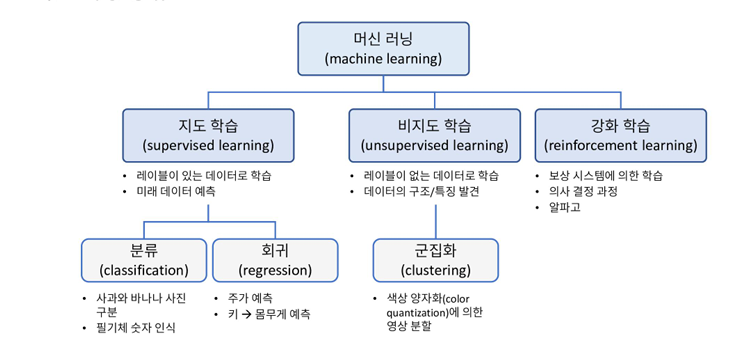

## openCV 머신 러닝 클래스
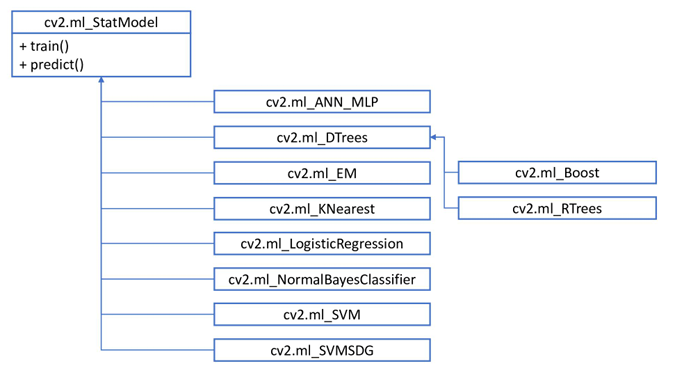<br>
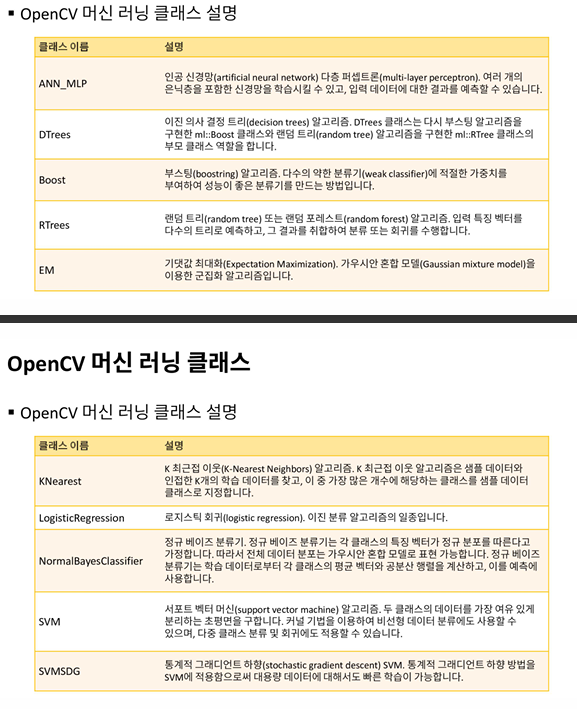

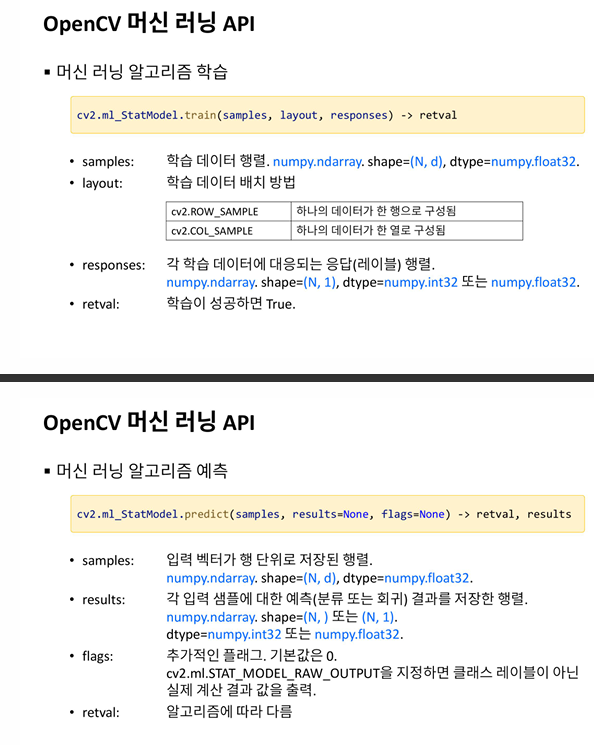

## K 최근접 이웃 알고리즘
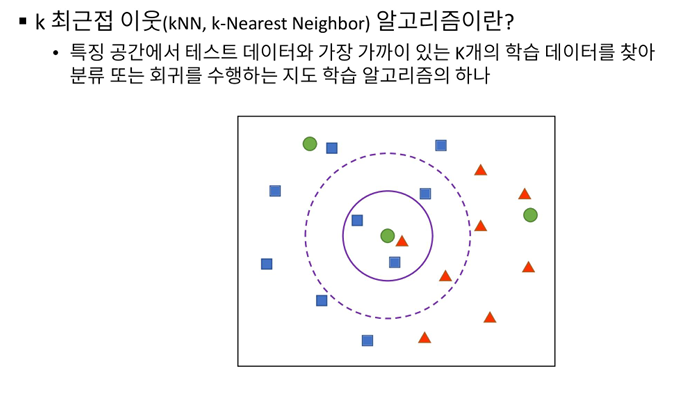
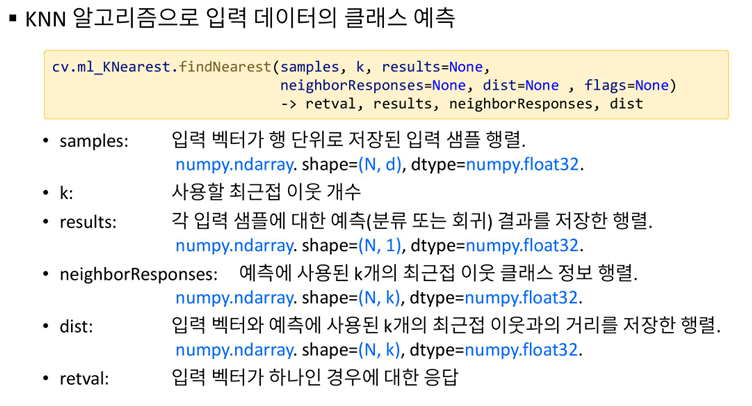

In [ ]:
import numpy as np
import cv2


def on_k_changed(pos):  # 트랙바 설치 트랙바에대한 콜백함수
    global k_value

    k_value = pos
    if k_value < 1:
        k_value = 1

    trainAndDisplay()


def addPoint(x, y, c):
    train.append([x, y])
    label.append([c])


def trainAndDisplay():
    """## 주석 지우고 보여줌"""
    trainData = np.array(train, dtype=np.float32)
    labelData = np.array(label, dtype=np.int32)

    knn.train(trainData, cv2.ml.ROW_SAMPLE, labelData)

    ####### 여기서부터 디스플레이를 위해 작성한 함수
    h, w = img.shape[:2]
    for y in range(h):
        for x in range(w):
            sample = np.array([[x, y]]).astype(np.float32)

            ret, _, _, _ = knn.findNearest(sample, k_value)

            ret = int(ret)
            if ret == 0:
                img[y, x] = (128, 128, 255)
            elif ret == 1:
                img[y, x] = (128, 255, 128)
            elif ret == 2:
                img[y, x] = (255, 128, 128)

    for i in range(len(train)):
        x, y = train[i]
        l = label[i][0]

        if l == 0:
            cv2.circle(img, (x, y), 5, (0, 0, 128), -1, cv2.LINE_AA)
        elif l == 1:
            cv2.circle(img, (x, y), 5, (0, 128, 0), -1, cv2.LINE_AA)
        elif l == 2:
            cv2.circle(img, (x, y), 5, (128, 0, 0), -1, cv2.LINE_AA)

    cv2.imshow("knn", img)


###### 2차원 평면상에 점을 찍고 점들을 3개의 클래스로 구분하는 프로그램
# 학습 데이터 & 레이블
train = []  ###### 2차원 좌표 여러개 집어넣을거임(90개)
label = []  ###### 90개의 데이터에 대한 레이블

k_value = 1
img = np.full((500, 500, 3), 255, np.uint8)  # 500x500 모두 흰색(255)
knn = cv2.ml.KNearest_create()  # k-NN 생성

# 랜덤 데이터 생성
NUM = 30
rn = np.zeros(
    (NUM, 2), np.int32
)  ##########30행 2열  60개의 Element에 대한 랜덤넘버 제네레이션

# (150, 150) 근방의 점은 0번 클래스로 설정
cv2.randn(rn, 0, 50)  ########### 가우시안 형태 넘버를 생성해주는 함수
for i in range(NUM):
    addPoint(
        rn[i, 0] + 150, rn[i, 1] + 150, 0
    )  ######### (x,y, 이점의 클래스)  (150, 150 ) +50 근방에 생성 라벨은 0

# (350, 150) 근방의 점은 1번 클래스로 설정  라벨 1번
cv2.randn(rn, 0, 50)
for i in range(NUM):
    addPoint(rn[i, 0] + 350, rn[i, 1] + 150, 1)

# (250, 400) 근방의 점은 2번 클래스로 설정
cv2.randn(rn, 0, 70)
for i in range(NUM):
    addPoint(rn[i, 0] + 250, rn[i, 1] + 400, 2)

# 영상 출력 창 생성 & 트랙바 생성
cv2.namedWindow("knn")
cv2.createTrackbar("k_value", "knn", 1, 5, on_k_changed)

# KNN 결과 출력
trainAndDisplay()
cv2.waitKey()
cv2.destroyAllWindows()

[153. 160.]
[0]
[153. 160.]
[0]
[153. 160.]
[0]
[153. 160.]
[0]


## KNN 필기체 숫자 인식

In [8]:
import sys
import numpy as np
import cv2


oldx, oldy = -1, -1


def on_mouse(event, x, y, flags, _):
    global oldx, oldy

    if event == cv2.EVENT_LBUTTONDOWN:
        oldx, oldy = x, y

    elif event == cv2.EVENT_LBUTTONUP:
        oldx, oldy = -1, -1

    elif event == cv2.EVENT_MOUSEMOVE:
        if flags & cv2.EVENT_FLAG_LBUTTON:
            cv2.line(img, (oldx, oldy), (x, y), (255, 255, 255), 40, cv2.LINE_AA)
            oldx, oldy = x, y
            cv2.imshow("img", img)


# 학습 & 레이블 행렬 생성

digits = cv2.imread("images/digits.png", cv2.IMREAD_GRAYSCALE)

if digits is None:
    print("Image load failed!")
    sys.exit()

h, w = digits.shape[:2]

cells = [np.hsplit(row, w // 20) for row in np.vsplit(digits, h // 20)]
cells = np.array(cells)
print("cells shape: ", cells.shape)
train_images = cells.reshape(-1, 400).astype(np.float32)
print("trains_images.shpae:", train_images.shape)
train_labels = np.repeat(np.arange(10), len(train_images) / 10)
print("train_labels", train_labels)
print("tain_labels.shape", train_labels.shape)
# KNN 학습

knn = cv2.ml.KNearest_create()
knn.train(train_images, cv2.ml.ROW_SAMPLE, train_labels)

# 사용자 입력 영상에 대해 예측

img = np.zeros((400, 400), np.uint8)

cv2.imshow("img", img)
cv2.setMouseCallback("img", on_mouse)

while True:
    key = cv2.waitKey()

    if key == 27:
        break
    elif key == ord(" "):
        test_image = cv2.resize(img, (20, 20), interpolation=cv2.INTER_AREA)
        test_image = test_image.reshape(-1, 400).astype(np.float32)

        ret, _, _, _ = knn.findNearest(test_image, 5)
        print(int(ret))

        img.fill(0)
        cv2.imshow("img", img)

cv2.destroyAllWindows()

cells shape:  (50, 100, 20, 20)
trains_images.shpae: (5000, 400)
train_labels [0 0 0 ... 9 9 9]
tain_labels.shape (5000,)


## 서포트 벡터 머신(SVM) 알고리즘
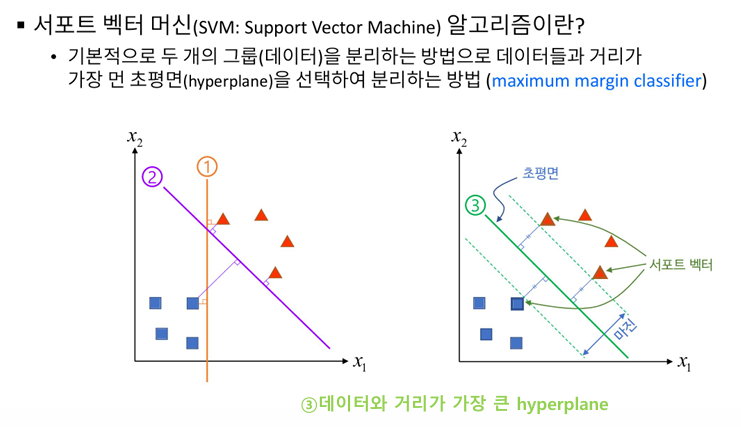

* xor 의 경우 2차원에서 분리할수없고 3차원으로 확장하여 분리가능하다

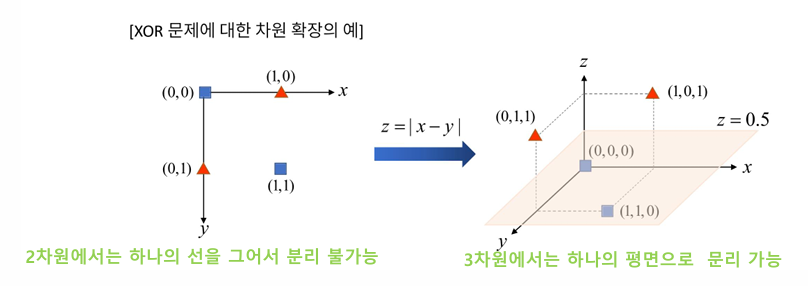

## SVM API 사용하기
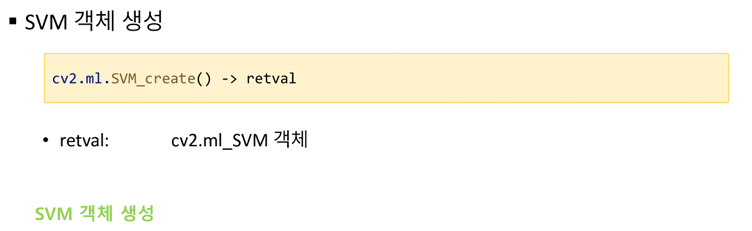
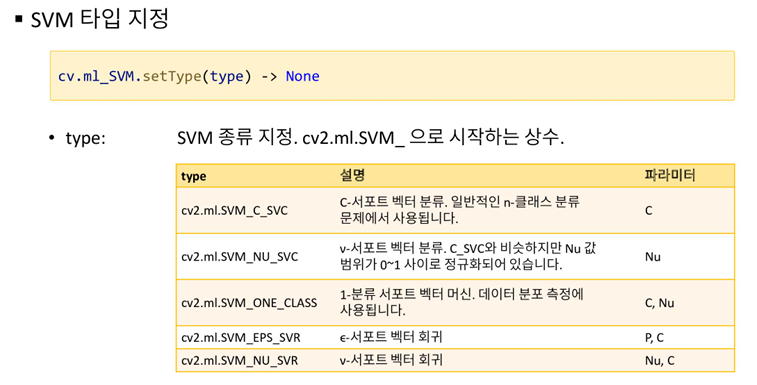
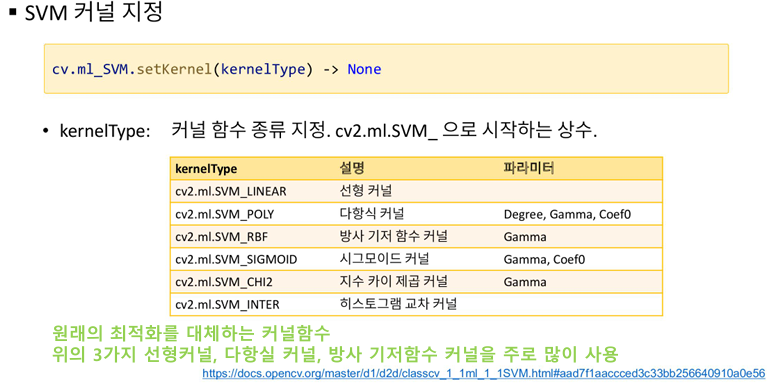
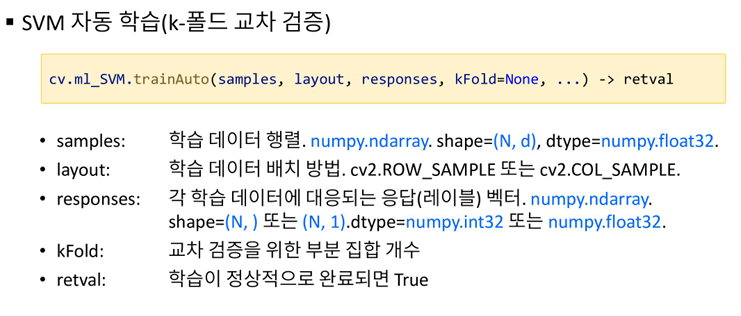

In [6]:
import sys
import numpy as np
import cv2


trains = np.array(
    [
        [150, 200],
        [200, 250],
        [100, 250],
        [150, 300],
        [350, 100],
        [400, 200],
        [400, 300],
        [350, 400],
    ],
    dtype=np.float32,
)
labels = np.array([0, 0, 0, 0, 1, 1, 1, 1])

svm = cv2.ml.SVM_create()
svm.setType(cv2.ml.SVM_C_SVC)

# 커널을 지정하여 분리 기준을 정함
# svm.setKernel(cv2.ml.SVM_LINEAR)
svm.setKernel(cv2.ml.SVM_RBF)

svm.trainAuto(trains, cv2.ml.ROW_SAMPLE, labels)
print("C:", svm.getC())
print("Gamma:", svm.getGamma())

w, h = 500, 500
img = np.zeros((h, w, 3), dtype=np.uint8)
for y in range(h):
    for x in range(w):
        test = np.array([[x, y]], dtype=np.float32)
        _, res = svm.predict(test)
        ret = int(res[0, 0])

        if ret == 0:
            img[y, x] = (128, 128, 255)  # Red
        else:
            img[y, x] = (128, 255, 128)  # Green

color = [(0, 0, 128), (0, 128, 0)]

for i in range(trains.shape[0]):
    x = int(trains[i, 0])
    y = int(trains[i, 1])
    l = labels[i]

    cv2.circle(img, (x, y), 5, color[l], -1, cv2.LINE_AA)

cv2.imshow("svm", img)
cv2.waitKey()
cv2.destroyAllWindows()

C: 2.5
Gamma: 1e-05


## HOG & SVM 필기체 숫자 인식
* knn 알고리즘 보다 더 좋은 정확도를 보여줌

In [13]:
import sys
import numpy as np
import cv2


oldx, oldy = -1, -1


def on_mouse(event, x, y, flags, _):
    global oldx, oldy

    if event == cv2.EVENT_LBUTTONDOWN:
        oldx, oldy = x, y

    elif event == cv2.EVENT_LBUTTONUP:
        oldx, oldy = -1, -1

    elif event == cv2.EVENT_MOUSEMOVE:
        if flags & cv2.EVENT_FLAG_LBUTTON:
            cv2.line(img, (oldx, oldy), (x, y), (255, 255, 255), 40, cv2.LINE_AA)
            oldx, oldy = x, y
            cv2.imshow("img", img)


######### 실제 함수 시작
# 학습 데이터 & 레이블 행렬 생성

digits = cv2.imread("images/digits.png", cv2.IMREAD_GRAYSCALE)

if digits is None:
    print("Image load failed!")
    sys.exit()

h, w = digits.shape[:2]
hog = cv2.HOGDescriptor((20, 20), (10, 10), (5, 5), (5, 5), 9)
######### 20,20 은 하나의 영상 크기 / 블록의 크기 10,10 / 셀의크기 5,5 / 블록의 이동 스크라이드 5,5 셀크기와 동일
print("Descriptor Size:", hog.getDescriptorSize())

cells = [np.hsplit(row, w // 20) for row in np.vsplit(digits, h // 20)]
cells = np.array(cells)
cells = cells.reshape(-1, 20, 20)  # shape=(5000, 20, 20)

desc = []
for img in cells:
    desc.append(hog.compute(img))

train_desc = np.array(desc)  ######### train_desc shape 5000 x 324 x 1
train_desc = train_desc.squeeze().astype(
    np.float32
)  ######## 1은 필요 없으므로 squeeze 함수 사용
train_labels = np.repeat(np.arange(10), len(train_desc) / 10)

print("train_desc.shape:", train_desc.shape)
print("train_labels.shape:", train_labels.shape)

# SVM 학습

svm = cv2.ml.SVM_create()
svm.setType(cv2.ml.SVM_C_SVC)
svm.setKernel(cv2.ml.SVM_RBF)
svm.setC(2.5)
svm.setGamma(0.50625)

svm.train(train_desc, cv2.ml.ROW_SAMPLE, train_labels)
svm.save("svmdigits.yml")

# 사용자 입력 영상에 대해 예측
###### 마우스로 그림을 그리게 하기 위한 소스코드
img = np.zeros((400, 400), np.uint8)

cv2.imshow("img", img)
cv2.setMouseCallback("img", on_mouse)

while True:
    key = cv2.waitKey()

    if key == 27:
        break
    elif key == ord(" "):
        test_image = cv2.resize(img, (20, 20), interpolation=cv2.INTER_AREA)
        test_desc = hog.compute(test_image).reshape(-1, 1).T

        _, res = svm.predict(test_desc)
        print(int(res[0, 0]))

        img.fill(0)
        cv2.imshow("img", img)

cv2.destroyAllWindows()

Descriptor Size: 324
train_desc.shape: (5000, 324)
train_labels.shape: (5000,)


## 숫자 영상 정규화
* 정중앙에 숫자를 쓰지않을경우 정확도 가 떨어짐
* 학습 데이터 영상과 테스트 데이터 영상의 위치, 크기, 회전 등의 요소를 정규화 하여 인식 성능을 향상

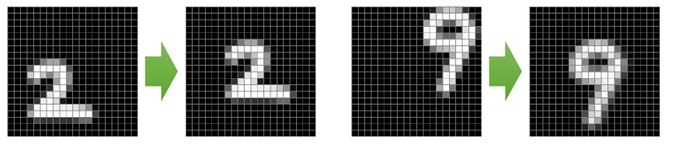

In [ ]:
import sys
import numpy as np
import cv2


oldx, oldy = -1, -1


def on_mouse(event, x, y, flags, _):
    global oldx, oldy

    if event == cv2.EVENT_LBUTTONDOWN:
        oldx, oldy = x, y

    elif event == cv2.EVENT_LBUTTONUP:
        oldx, oldy = -1, -1

    elif event == cv2.EVENT_MOUSEMOVE:
        if flags & cv2.EVENT_FLAG_LBUTTON:
            cv2.line(img, (oldx, oldy), (x, y), (255, 255, 255), 40, cv2.LINE_AA)
            oldx, oldy = x, y
            cv2.imshow("img", img)


# 정규화 함수
def norm_digit(img):
    m = cv2.moments(img)
    cx = m["m10"] / m["m00"]  # m00: 0차 모먼트 m10, m01 : 1차 모먼트
    cy = m["m01"] / m["m00"]
    h, w = img.shape[:2]
    aff = np.array([[1, 0, w / 2 - cx], [0, 1, h / 2 - cy]], dtype=np.float32)
    dst = cv2.warpAffine(img, aff, (0, 0))
    return dst


# 학습 데이터 & 레이블 행렬 생성

digits = cv2.imread("images/digits.png", cv2.IMREAD_GRAYSCALE)

if digits is None:
    print("Image load failed!")
    sys.exit()

h, w = digits.shape[:2]
hog = cv2.HOGDescriptor((20, 20), (10, 10), (5, 5), (5, 5), 9)
print("Descriptor Size:", hog.getDescriptorSize())

cells = [np.hsplit(row, w // 20) for row in np.vsplit(digits, h // 20)]
cells = np.array(cells)
cells = cells.reshape(-1, 20, 20)  # shape=(5000, 20, 20)

desc = []
for img in cells:
    img = norm_digit(img)
    desc.append(hog.compute(img))

train_desc = np.array(desc)
train_desc = train_desc.squeeze().astype(np.float32)
train_labels = np.repeat(np.arange(10), len(train_desc) / 10)

# SVM 학습

svm = cv2.ml.SVM_create()
svm.setType(cv2.ml.SVM_C_SVC)
svm.setKernel(cv2.ml.SVM_RBF)
svm.setC(2.5)
svm.setGamma(0.50625)

svm.train(train_desc, cv2.ml.ROW_SAMPLE, train_labels)
# svm.save('svmdigits.yml')

# 사용자 입력 영상에 대해 예측

img = np.zeros((400, 400), np.uint8)

cv2.imshow("img", img)
cv2.setMouseCallback("img", on_mouse)

while True:
    key = cv2.waitKey()

    if key == 27:
        break
    elif key == ord(" "):
        test_image = cv2.resize(img, (20, 20), interpolation=cv2.INTER_AREA)

        # compute 하기전 정규화
        test_image = norm_digit(test_image)
        test_desc = hog.compute(test_image).reshape(-1, 1).T

        _, res = svm.predict(test_desc)
        print(int(res[0, 0]))

        img.fill(0)
        cv2.imshow("img", img)

cv2.destroyAllWindows()

Descriptor Size: 324


## k-평균 알고리즘
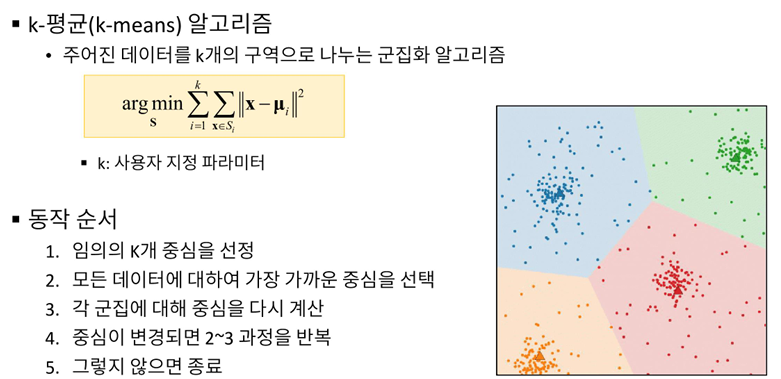
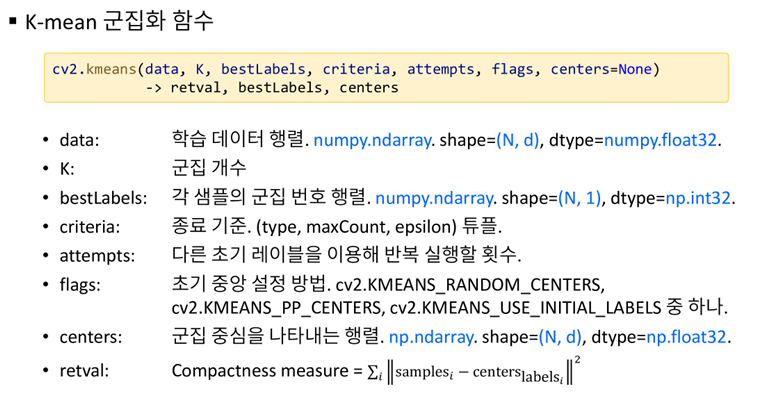

In [28]:
import sys
import numpy as np
import cv2


# 입력 영상 불러오기
src = cv2.imread("images/flowers.jpg")

if src is None:
    print("Image load failed")
    sys.exit()

# 차원 변환 & np.float32 자료형 변환
data = src.reshape((-1, 3)).astype(np.float32)
print(f"src shape : {src.shape}")
print(f"data shape : {data.shape}")

# K-means 알고리즘
criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

for K in range(2, 9):
    print("K:", K)
    ret, label, center = cv2.kmeans(
        data, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS
    )

    # 군집화 결과를 이용하여 출력 영상 생성
    center = np.uint8(center)
    print("center", center)
    print("label", label)
    print("center.shape", center.shape, " label.shape", label.shape)
    print("label.flattern().shape", label.flatten().shape)
    print(label.flatten())
    dst = center[label.flatten()]  # 각 픽셀을 K개 군집 중심 색상으로 치환
    print("dst.shape", dst.shape)
    dst = dst.reshape((src.shape))

    cv2.imshow("src", src)
    cv2.imshow("dst", dst)
    if cv2.waitKey() == 27:
        break

cv2.destroyAllWindows()

src shape : (640, 480, 3)
data shape : (307200, 3)
K: 2
center [[178 111 228]
 [ 44 124 119]]
label [[1]
 [1]
 [1]
 ...
 [0]
 [0]
 [0]]
center.shape (2, 3)  label.shape (307200, 1)
label.flattern().shape (307200,)
[1 1 1 ... 0 0 0]
dst.shape (307200, 3)


## 챕터 11 실전문제

In [ ]:
import sys
import numpy as np
import cv2


# 숫자 영상을 20x20 크기 안에 적당히 들어가도록 리사이즈
def norm_img(img):
    h, w = img.shape[:2]

    img = ~img
    blr = cv2.GaussianBlur(img, (0, 0), 2)

    sf = 14.0 / h  # scale factor. 위/아래 3픽셀씩 여백 고려.
    if w > h:
        sf = 14.0 / w

    img2 = cv2.resize(img, (0, 0), fx=sf, fy=sf, interpolation=cv2.INTER_AREA)
    h2, w2 = img2.shape[:2]
    a = (20 - w2) // 2
    b = (20 - h2) // 2

    dst = np.zeros((20, 20), dtype=np.uint8)
    dst[b : b + h2, a : a + w2] = img2[:, :]

    return dst


# 입력 필기체 숫자 이미지 불러오기
src = cv2.imread("images/handwritten1.png")

if src is None:
    print("Image load failed!")
    sys.exit()

# HOG 객체 생성
hog = cv2.HOGDescriptor((20, 20), (10, 10), (5, 5), (5, 5), 9)

# 미리 학습된 SVM 데이터 불러오기
svm = cv2.ml.SVM_load("svmdigits.yml")

# 이진화 & 레이블링
src_gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
_, src_bin = cv2.threshold(src_gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)

cnt, _, stats, _ = cv2.connectedComponentsWithStats(src_bin)

dst = src.copy()

for i in range(1, cnt):
    x, y, w, h, s = stats[i]

    if s < 100:
        continue

    # 각각의 숫자 부분 영상을 정규화한 후 HOG&SVM 숫자 인식
    digit = norm_img(src_gray[y : y + h, x : x + w])
    test_desc = hog.compute(digit).reshape(-1, 1).T
    _, res = svm.predict(test_desc)

    # HOG&SVM 숫자 인식 결과 출력
    cv2.rectangle(dst, (x, y, w, h), (0, 0, 255))
    cv2.putText(
        dst,
        str(int(res[0, 0])),
        (x, y - 5),
        cv2.FONT_HERSHEY_SIMPLEX,
        1,
        (0, 0, 255),
        2,
        cv2.LINE_AA,
    )

cv2.imshow("dst", dst)
cv2.waitKey()
cv2.destroyAllWindows()

# YOLOv3

In [11]:
import sys
import numpy as np
import cv2


# 모델 & 설정 파일
model = "yolo_v3/yolov3.weights"
config = "yolo_v3/yolov3.cfg"
class_labels = "yolo_v3/coco.names"
confThreshold = 0.5
nmsThreshold = 0.4

# 테스트 이미지 파일
img_files = [
    "images/dog.jpg",
    "images/person.jpg",
    "images/sheep.jpg",
]

# 네트워크 생성
net = cv2.dnn.readNet(model, config)

if net.empty():
    print("Net open failed!")
    sys.exit()

# 클래스 이름 불러오기

classes = []
with open(class_labels, "rt") as f:
    classes = f.read().rstrip("\n").split("\n")

colors = np.random.uniform(0, 255, size=(len(classes), 3))

# 출력 레이어 이름 받아오기

layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]
# output_layers = ['yolo_82', 'yolo_94', 'yolo_106']

# 실행

for f in img_files:
    img = cv2.imread(f)

    if img is None:
        continue

    # 블롭 생성 & 추론
    blob = cv2.dnn.blobFromImage(img, 1 / 255.0, (320, 320), swapRB=True)
    net.setInput(blob)
    outs = net.forward(output_layers)

    # outs는 3개의 ndarray 리스트.
    # outs[0].shape=(507, 85), 13*13*3=507
    # outs[1].shape=(2028, 85), 26*26*3=2028
    # outs[2].shape=(8112, 85), 52*52*3=8112

    h, w = img.shape[:2]

    class_ids = []
    confidences = []
    boxes = []

    for out in outs:
        for detection in out:
            # detection: 4(bounding box) + 1(objectness_score) + 80(class confidence)
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > confThreshold:
                # 바운딩 박스 중심 좌표 & 박스 크기
                cx = int(detection[0] * w)
                cy = int(detection[1] * h)
                bw = int(detection[2] * w)
                bh = int(detection[3] * h)

                # 바운딩 박스 좌상단 좌표
                sx = int(cx - bw / 2)
                sy = int(cy - bh / 2)

                boxes.append([sx, sy, bw, bh])
                confidences.append(float(confidence))
                class_ids.append(int(class_id))

    # 비최대 억제
    indices = cv2.dnn.NMSBoxes(boxes, confidences, confThreshold, nmsThreshold)

    for i in indices:
        sx, sy, bw, bh = boxes[i]
        label = f"{classes[class_ids[i]]}: {confidences[i]:.2}"
        color = colors[class_ids[i]]
        cv2.rectangle(img, (sx, sy, bw, bh), color, 2)
        cv2.putText(
            img,
            label,
            (sx, sy - 10),
            cv2.FONT_HERSHEY_SIMPLEX,
            0.7,
            color,
            2,
            cv2.LINE_AA,
        )

    t, _ = net.getPerfProfile()
    label = "Inference time: %.2f ms" % (t * 1000.0 / cv2.getTickFrequency())
    cv2.putText(
        img, label, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 1, cv2.LINE_AA
    )

    cv2.imshow("img", img)
    cv2.waitKey()

cv2.destroyAllWindows()

In [14]:
import sys
import numpy as np
import cv2


# 모델 & 설정 파일
model = "openpose/pose_iter_440000.caffemodel"
config = "openpose/pose_deploy_linevec.prototxt"

# 포즈 점 개수, 점 연결 개수, 연결 점 번호 쌍
nparts = 18
npairs = 17
pose_pairs = [
    (1, 2),
    (2, 3),
    (3, 4),  # 왼팔
    (1, 5),
    (5, 6),
    (6, 7),  # 오른팔
    (1, 8),
    (8, 9),
    (9, 10),  # 왼쪽다리
    (1, 11),
    (11, 12),
    (12, 13),  # 오른쪽다리
    (1, 0),
    (0, 14),
    (14, 16),
    (0, 15),
    (15, 17),
]  # 얼굴

# 테스트 이미지 파일
img_files = ["images/pose1.jpg", "images/pose2.jpg", "images/pose3.jpg"]

# 네트워크 생성
net = cv2.dnn.readNet(model, config)

if net.empty():
    print("Net open failed!")
    sys.exit()

for f in img_files:
    img = cv2.imread(f)

    if img is None:
        continue

    # 블롭 생성 & 추론
    blob = cv2.dnn.blobFromImage(img, 1 / 255.0, (368, 368))
    net.setInput(blob)
    out = net.forward()  # out.shape=(1, 57, 46, 46)

    h, w = img.shape[:2]

    # 검출된 점 추출
    points = []
    for i in range(nparts):
        heatMap = out[0, i, :, :]

        """
        heatImg = cv2.normalize(heatMap, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
        heatImg = cv2.resize(heatImg, (w, h))
        heatImg = cv2.cvtColor(heatImg, cv2.COLOR_GRAY2BGR)
        heatImg = cv2.addWeighted(img, 0.5, heatImg, 0.5, 0)
        cv2.imshow('heatImg', heatImg)
        cv2.waitKey()
        """

        _, conf, _, point = cv2.minMaxLoc(heatMap)
        x = int(w * point[0] / out.shape[3])
        y = int(h * point[1] / out.shape[2])

        points.append((x, y) if conf > 0.1 else None)  # heat map threshold=0.1

    # 검출 결과 영상 만들기
    for pair in pose_pairs:
        p1 = points[pair[0]]
        p2 = points[pair[1]]

        if p1 is None or p2 is None:
            continue

        cv2.line(img, p1, p2, (0, 255, 0), 3, cv2.LINE_AA)
        cv2.circle(img, p1, 4, (0, 0, 255), -1, cv2.LINE_AA)
        cv2.circle(img, p2, 4, (0, 0, 255), -1, cv2.LINE_AA)

    # 추론 시간 출력
    t, _ = net.getPerfProfile()
    label = "Inference time: %.2f ms" % (t * 1000.0 / cv2.getTickFrequency())
    cv2.putText(
        img, label, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 1, cv2.LINE_AA
    )

    cv2.imshow("img", img)
    cv2.waitKey()

cv2.destroyAllWindows()

## EAST: 문자 영역 검출

In [ ]:
import sys
import math
import numpy as np
import cv2


def decode(scores, geometry, scoreThreshold):
    detections = []
    confidences = []

    # geometry.shape=(1, 5, 80, 80)
    # scores.shape=(1, 1, 80, 80)

    height = scores.shape[2]
    width = scores.shape[3]

    for y in range(0, height):
        # Extract data from scores
        scoresData = scores[0][0][y]
        x0_data = geometry[0][0][y]
        x1_data = geometry[0][1][y]
        x2_data = geometry[0][2][y]
        x3_data = geometry[0][3][y]
        anglesData = geometry[0][4][y]

        for x in range(0, width):
            score = scoresData[x]

            if score < scoreThreshold:
                continue

            # feature map은 320x320 블롭의 1/4 크기이므로, 다시 4배 확대
            offsetX = x * 4.0
            offsetY = y * 4.0
            angle = anglesData[x]

            # (offsetX, offsetY) 위치에서 회전된 사각형 정보 추출
            cosA = math.cos(angle)
            sinA = math.sin(angle)
            h = x0_data[x] + x2_data[x]
            w = x1_data[x] + x3_data[x]

            # 회전된 사각형의 한쪽 모서리 점 좌표 계산
            offset = [
                offsetX + cosA * x1_data[x] + sinA * x2_data[x],
                offsetY - sinA * x1_data[x] + cosA * x2_data[x],
            ]

            # 회전된 사각형의 대각선에 위치한 두 모서리 점 좌표 계산
            p1 = (-sinA * h + offset[0], -cosA * h + offset[1])
            p3 = (-cosA * w + offset[0], sinA * w + offset[1])
            center = ((p1[0] + p3[0]) / 2, (p1[1] + p3[1]) / 2)

            detections.append((center, (w, h), -1 * angle * 180.0 / math.pi))
            confidences.append(float(score))

    return [detections, confidences]


# 모델 & 설정 파일
model = "EAST/frozen_east_text_detection.pb"
confThreshold = 0.5
nmsThreshold = 0.4

# 테스트 이미지 파일
img_files = ["images/road_closed.jpg", "images/patient.jpg", "images/copy_center.jpg"]

# 네트워크 생성
net = cv2.dnn.readNet(model)

if net.empty():
    print("Net open failed!")
    sys.exit()

# 출력 레이어 이름 받아오기
"""
layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
print(output_layers)
"""

# 실행

for f in img_files:
    img = cv2.imread(f)

    if img is None:
        continue

    # 블롭 생성 & 추론 진행
    blob = cv2.dnn.blobFromImage(img, 1, (320, 320), (123.68, 116.78, 103.94), True)
    net.setInput(blob)
    scores, geometry = net.forward(
        ["feature_fusion/Conv_7/Sigmoid", "feature_fusion/concat_3"]
    )

    # scores.shape=(1, 1, 80, 80)
    # geometry.shape=(1, 5, 80, 80)

    # score가 confThreshold보다 큰 RBOX 정보를 RotatedRect 형식으로 변환하여 반환
    [boxes, confidences] = decode(scores, geometry, confThreshold)

    # 회전된 사각형에 대한 비최대 억제
    indices = cv2.dnn.NMSBoxesRotated(boxes, confidences, confThreshold, nmsThreshold)

    rw = img.shape[1] / 320
    rh = img.shape[0] / 320

    for i in indices:
        # 회전된 사각형의 네 모서리 점 좌표 계산 & 표시
        vertices = cv2.boxPoints(boxes[i])

        for j in range(4):
            vertices[j][0] *= rw
            vertices[j][1] *= rh

        for j in range(4):
            p1 = (int(vertices[j][0]), int(vertices[j][1]))
            p2 = (int(vertices[(j + 1) % 4][0]), int(vertices[(j + 1) % 4][1]))
            cv2.line(img, p1, p2, (0, 0, 255), 2, cv2.LINE_AA)

    cv2.imshow("img", img)
    cv2.waitKey()

cv2.destroyAllWindows()